In [1]:
import warnings

warnings.filterwarnings("ignore")

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from adaptive_al_v2.utils.data_loader import *
from collections import Counter
from itertools import chain
from wordcloud import WordCloud, STOPWORDS

sns.set_theme(style="whitegrid")

# Helper Functions

In [61]:
def load_data(dataset_name):
    _, (df_train, df_val, df_test) = eval(f"load_{dataset_name}()")
    print(f"Train size: {df_train.shape}")
    print(f"Validation size: {df_val.shape}")
    print(f"Test size: {df_test.shape}")
    df = pd.concat([df_train, df_val])
    print(f"The labels are: {sorted(df["label"].unique().tolist())}")
    return df


def plot_label_distribution(df, label_col="label", label_map=None, title="Label Distribution"):
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=label_col, palette="Set2")
    if label_map:
        plt.xticks(ticks=range(len(label_map)), labels=label_map.values())
    plt.title(title)
    plt.ylabel("Samples")
    plt.xlabel("Class")
    plt.show()


def plot_text_length_distribution(df, text_col="text", label_col="label", label_map=None, cutoff=1000, jump=25,
                                  title="Text Length Distribution"):
    df["text_length"] = df[text_col].apply(lambda x: len(str(x).split()))

    plt.figure(figsize=(6, 4))
    sns.histplot(df[df["text_length"] < cutoff]['text_length'], bins=range(0, cutoff + 1, jump), kde=True)
    plt.title(title)
    plt.xlabel("Number of Words")
    plt.ylabel("Frequency")
    plt.show()


    ax = sns.boxplot(x=label_col, y="text_length", data=df, palette="Set2")
    if label_map:
        ax.set_xticklabels(label_map.values())
    plt.title(f"{title} by {label_col.capitalize()}")
    plt.show()


def print_example_texts(df, label_col, label_map, num_examples=1):
    for label_id, label_name in label_map.items():
        print(f"\nExample from class: {label_name}")
        samples = df[df[label_col] == label_id].sample(num_examples)
        for i, sample in samples.iterrows():
            print(f"- {sample['text'][:500]}...")  # Print first 500 characters


def print_unique_word_count(df):
    tokenized = df["text"].apply(lambda x: str(x).lower().split())
    vocab = Counter(chain.from_iterable(tokenized))
    print(f"Unique words in training set: {len(vocab)}")


def print_frequent_words(df, label_col, label_map, top_n=10):
    for label_id, label_name in label_map.items():
        subset = df[df[label_col] == label_id]
        text_blob = " ".join(subset["text"].astype(str)).lower()
        words = text_blob.split()
        word_freq = Counter(words)
        most_common = word_freq.most_common(top_n)
        print(f"\nTop {top_n} words in class '{label_name}':")
        for word, freq in most_common:
            print(f"{word}: {freq}")


def plot_word_clouds(df, label_col, label_map, words_to_ignore=None):
    stopwords = set(STOPWORDS)
    if words_to_ignore:
        stopwords = stopwords.union(set(words_to_ignore))
    for label_id, label_name in label_map.items():
        subset = df[df[label_col] == label_id]
        text_blob = " ".join(subset["text"].astype(str)).lower()

        wordcloud = WordCloud(width=800, height=400, background_color='white',
                              stopwords=stopwords, max_words=100, collocations=False).generate(text_blob)

        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.title(f"Top Words in Class: {label_name}", fontsize=16)
        plt.show()

# AG News

## Load Dataset

In [62]:
ag_news_train_val = load_data("agnews")

Train size: (108000, 2)
Validation size: (12000, 2)
Test size: (7600, 2)
The labels are: [0, 1, 2, 3]


In [63]:
ag_news_train_val.head()

,text,label
0,10 seconds that change everything. ATHENS - Te...,1
1,Charline Labonte rises to challenge. Charline ...,1
2,Ex-El Paso Traders Plead Guilty to False Repor...,2
3,Brit deal #39;one year only. Even if British ...,1
4,"Signed, Sealed, Delivered. CHICAGO - The Cubs ...",1


## Class Balance

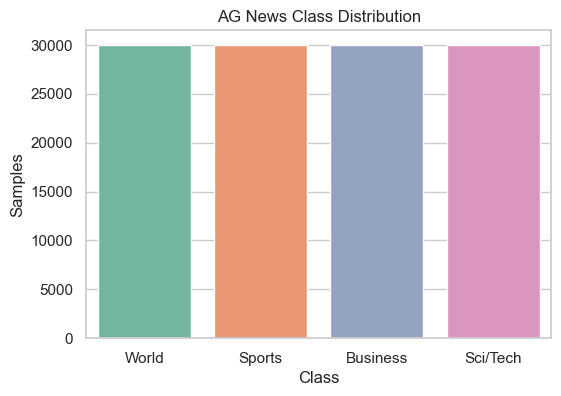

In [64]:
ag_news_label_map = {
    0: "World",
    1: "Sports",
    2: "Business",
    3: "Sci/Tech"
}

# Plotting a barplot of the label distribution
plot_label_distribution(ag_news_train_val, "label", ag_news_label_map, "AG News Class Distribution")

## Text Length Distribution

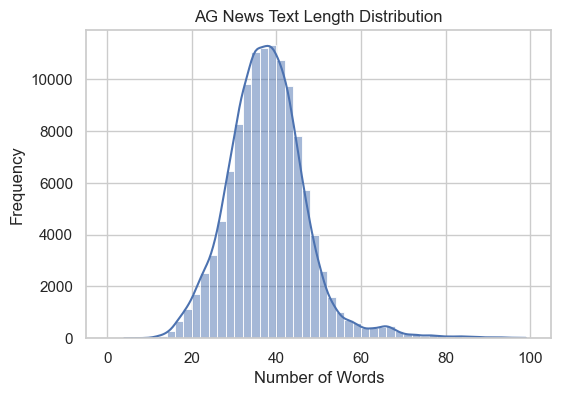

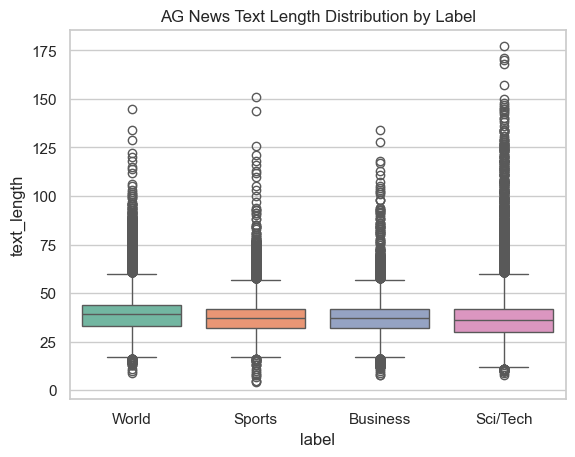

In [65]:
plot_text_length_distribution(ag_news_train_val, "text", "label", ag_news_label_map, 100, 2,
                              "AG News Text Length Distribution")

In [66]:
print_example_texts(ag_news_train_val, "label", ag_news_label_map, 1)


Example from class: World
- Thwarted U.S. May Seek Lone Push on Iran Sanctions (Reuters). Reuters - Iran escaped U.N. censure over its\nuclear program but Washington, which accuses it of seeking an\atomic bomb, said on Monday it reserved the right to take the\case to the Security Council on its own....

Example from class: Sports
- Henne rules the roost in romp for Wolverines. ANN ARBOR , Mich. -- Freshman Chad Henne threw for two touchdowns in a surprising start for Michigan, helping the eighth-ranked Wolverines to a 43-10 victory over Miami of Ohio yesterday that ended the nation's longest winning streak....

Example from class: Business
- Update 6: Hewlett-Packard Shares Up on Earnings News. Hewlett-Packard Co. #39;s shares rose more than 4 percent Wednesday as investors reacted to its report a day earlier that earnings rose 26.5 percent in the fourth quarter, led by record revenue growth across all of the computer giant #39;s business units ...

Example from class: Sci/Tech
- Cisc

## Unique Word Count

In [67]:
print_unique_word_count(ag_news_train_val)

Unique words in training set: 164438


## Most Frequent Words Per Class

In [68]:
print_frequent_words(ag_news_train_val, "label", ag_news_label_map, 10)


Top 10 words in class 'World':
the: 48544
in: 31943
to: 30757
a: 30375
of: 28813
and: 17445
on: 15871
-: 13513
for: 11450
that: 6708

Top 10 words in class 'Sports':
the: 63129
to: 27373
a: 25738
in: 23834
of: 20225
and: 15645
for: 13773
on: 12144
#39;s: 9482
at: 9302

Top 10 words in class 'Business':
the: 44299
to: 29713
a: 24956
of: 22627
in: 22031
and: 16939
on: 16372
for: 12051
its: 9487
-: 9006

Top 10 words in class 'Sci/Tech':
the: 47251
to: 31065
a: 26198
of: 26181
and: 18587
in: 17366
for: 12790
on: 11795
that: 9205
-: 7853


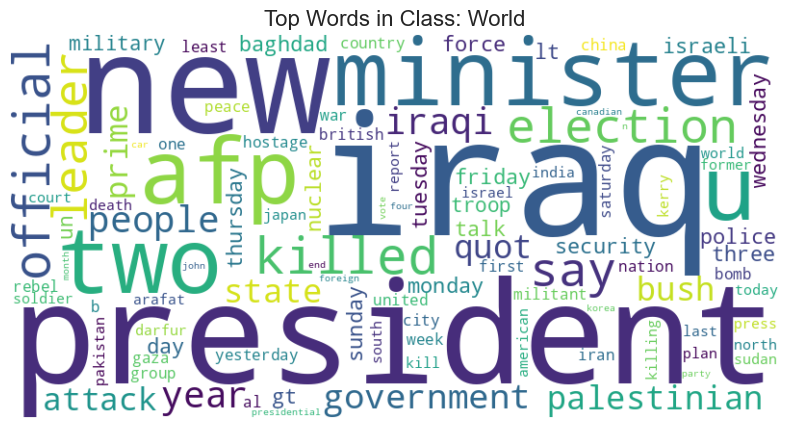

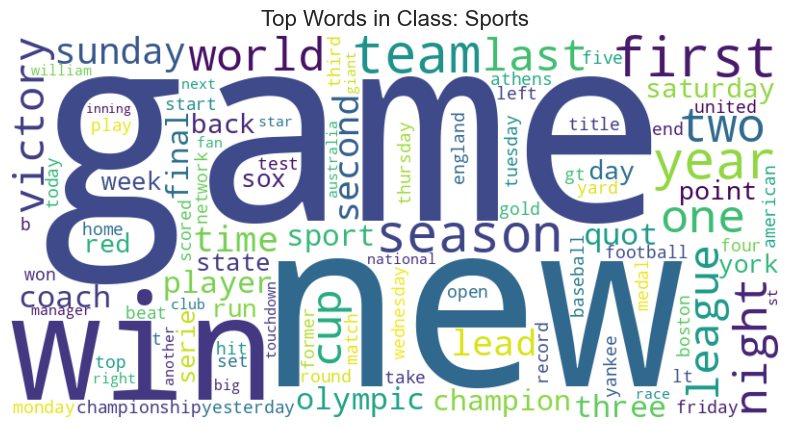

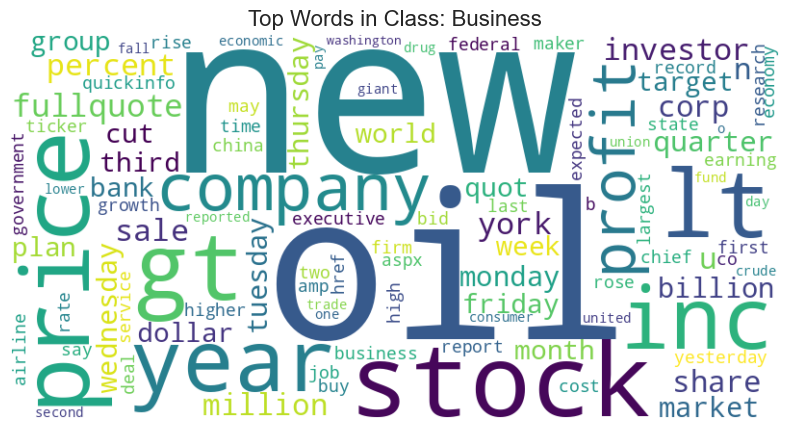

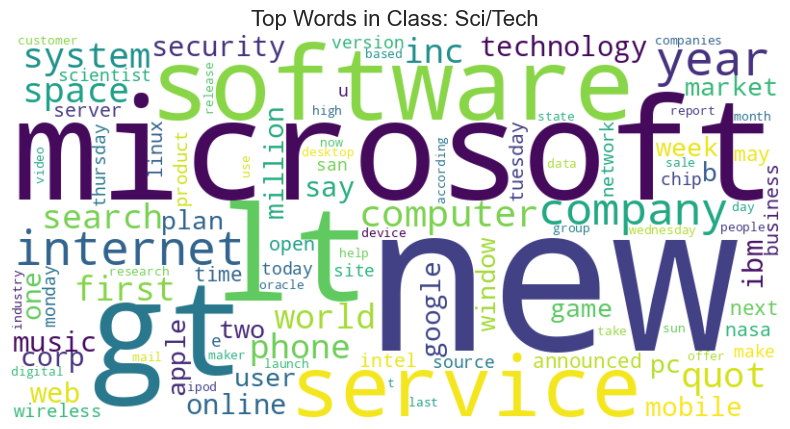

In [69]:
plot_word_clouds(ag_news_train_val, "label", ag_news_label_map,
                 words_to_ignore=["said", "will", "us", "reuters", "s", "ap"])

# IMDB

## Load Dataset

In [70]:
imdb_train_val = load_data("imdb")

Train size: (35000, 2)
Validation size: (5000, 2)
Test size: (10000, 2)
The labels are: [0, 1]


In [71]:
imdb_train_val.head()

,text,label
0,He really lost the plot with this one! None of...,0
1,I loved this movie when I was a teenager. LOVE...,0
2,This film almost gave me a nervous breakdown. ...,0
3,This movie was supposedly based on a non-ficti...,0
4,What a fascinating film. Even if it wasn't bas...,1


##  Label Distribution

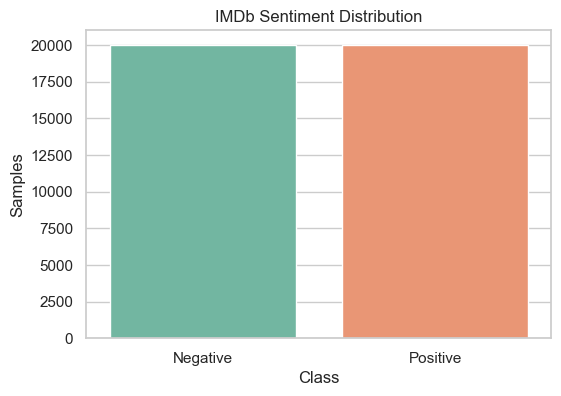

In [72]:
imdb_label_map = {0: "Negative", 1: "Positive"}
plot_label_distribution(imdb_train_val, label_map=imdb_label_map, title="IMDb Sentiment Distribution")

##  Text Length Analysis

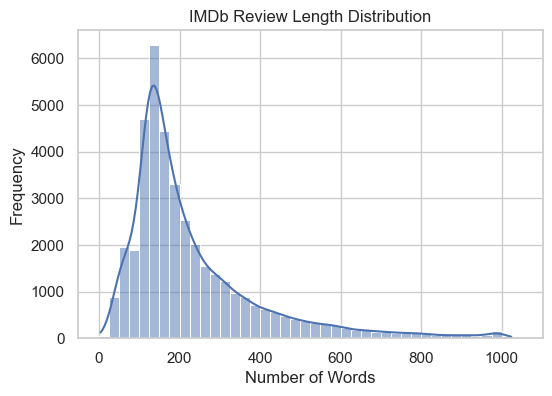

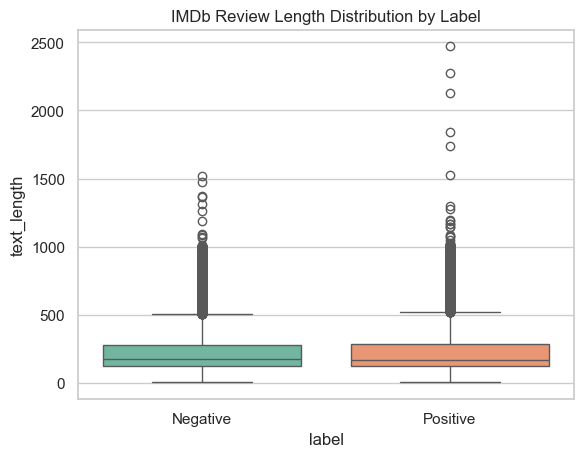

In [73]:
plot_text_length_distribution(imdb_train_val, "text", "label", imdb_label_map, 1050, 25,
                              "IMDb Review Length Distribution")

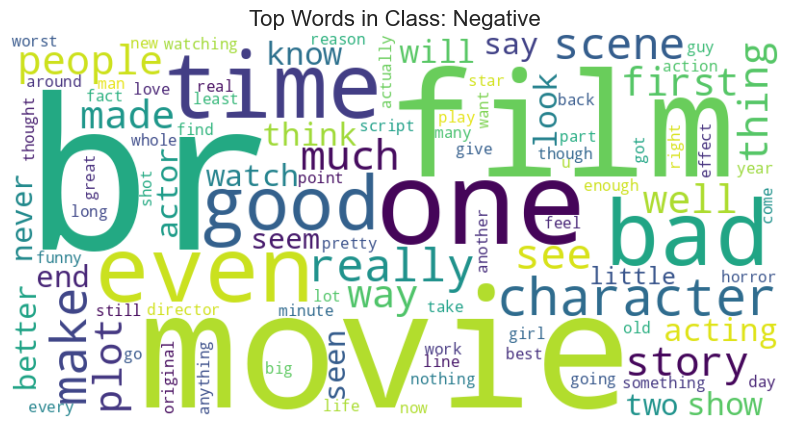

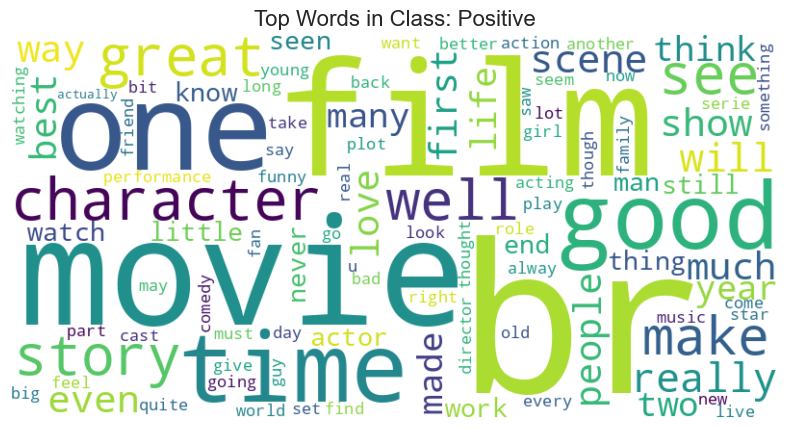

In [74]:
plot_word_clouds(imdb_train_val, "label", imdb_label_map)

# Jigsaw

## Load Dataset

In [75]:
jigsaw_train_val = load_data("jigsaw")

Train size: (111699, 2)
Validation size: (15957, 2)
Test size: (31915, 2)
The labels are: [0, 1]


In [76]:
jigsaw_train_val.head()

,text,label
0,The feather will land first!! (and please don'...,0
1,"I'm not sure I'm making my point clear, so I'l...",0
2,"""\r\n Did Mario Bros Air on Fox Kids? \r\nI kn...",0
3,Thankyou... it appears that someone else rever...,0
4,"felt happy to create it,",0


## Label Distribution

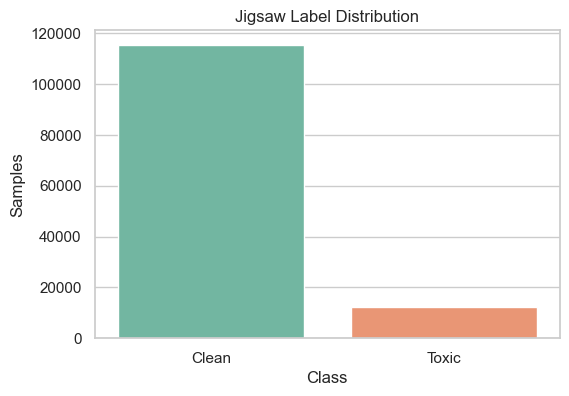

In [77]:
jigsaw_label_map = {0: "Clean", 1: "Toxic"}
plot_label_distribution(jigsaw_train_val, label_map=jigsaw_label_map, title="Jigsaw Label Distribution")

## Text Length Analysis

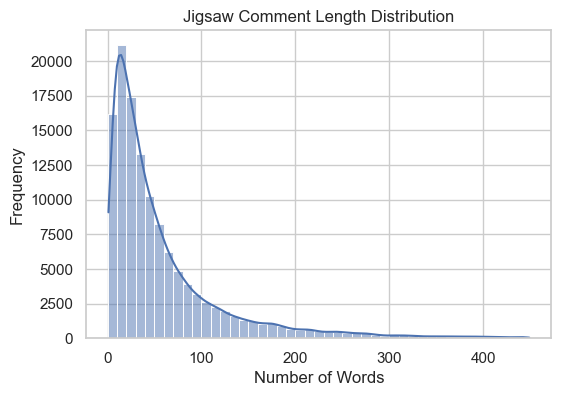

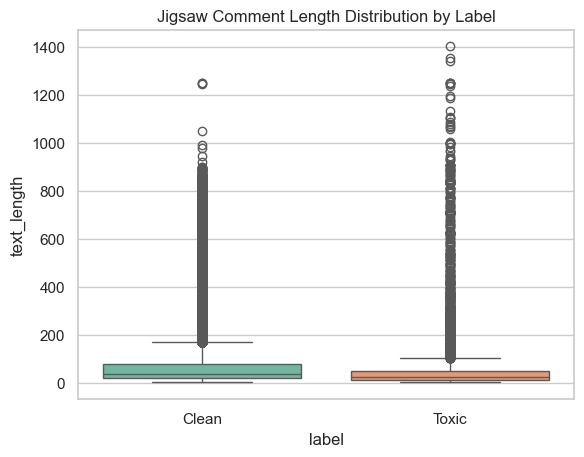

In [78]:
plot_text_length_distribution(jigsaw_train_val, "text", "label", jigsaw_label_map, 450, 10,
                              "Jigsaw Comment Length Distribution")

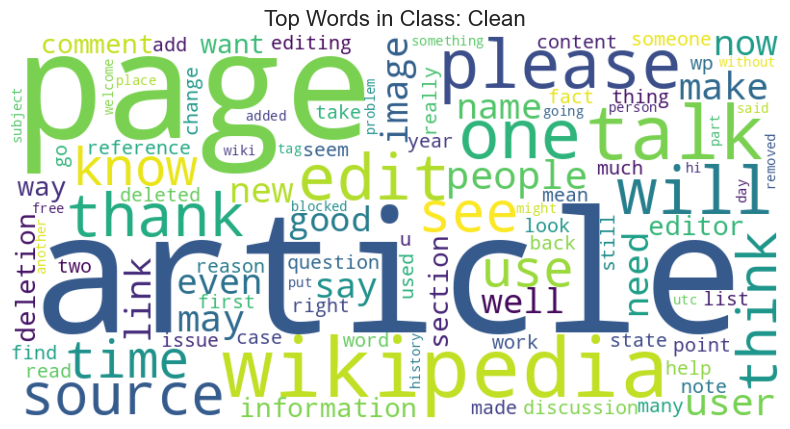

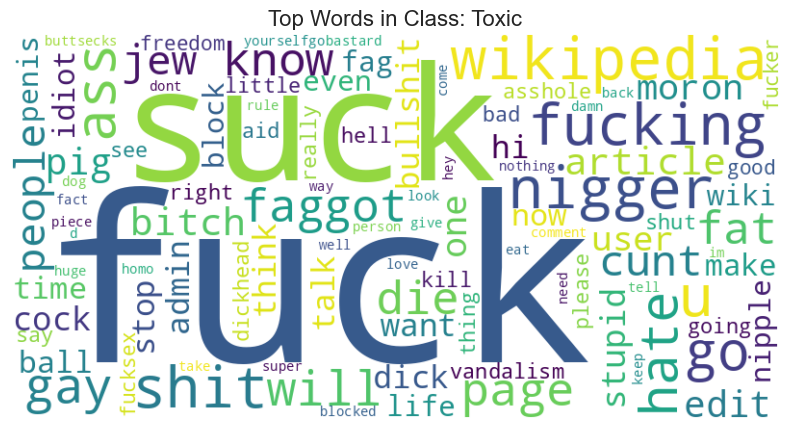

In [79]:
plot_word_clouds(jigsaw_train_val, "label", jigsaw_label_map)